# <span style="text-decoration: underline">AOS 51 Lab: Data Analysis for Climate Science, Session #3</span>
# <span>🌎🔥 👩🏿‍💻👩🏾‍💻 👨🏽‍💻👩🏼‍💻 👨🏼‍💻👨🏾‍💻👩🏽‍💻 👨🏿‍💻</span>

#### So far, we've been exposed to matplotlib, but mostly used Pandas to generate plots. Today we'll take a deep diver into Matplotlib and then enter the world of multi-dimensional data using Xarray!

---

In [34]:
# modules needed for today's lab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

# Diving Deeper Into Matplotlib 🎨

We've done a lot of plotting using Pandas, which is completely fine, but it's not as powerful as matplotlib.

Let's learn how plots actually work in matplotlib, then start customizing them to our liking. 

---
## Terminology 

Let's view [this Jupyer Notebook](https://github.com/matplotlib/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part1-Figures_Subplots_and_layouts.ipynb) to visualuze how Matplotlib defines three terms:

1. Figure
2. Axes/subplot
3. Y-axis and X-axis 

We see that:

1. The "Figure" is the highest-level container of the plot. It encapsulates the entire page where stuff is drawn. 

2. "Axes" are the area that we plot data on, along with any ticks/labels/etc associated with it. An Axes is created with a call to `subplot`, so Axes and Subplot are mostly synonymous terms now. 

3. Each Axes has an "XAxis" and a "YAxis". These contain the ticks, tick locations, labels, etc.
---

## Creating a plot

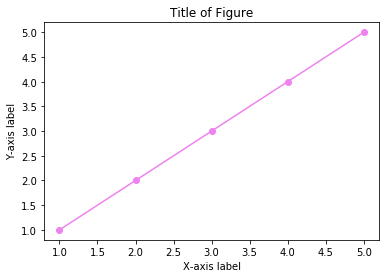

In [35]:
# Create some sample data
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

fig = plt.figure() # create a Figure
ax = fig.add_subplot(1,1,1) # create an axes/subbplot in the figure (row #, col #, subplot #) = (1, 1, 1)
ax.plot(x_data, y_data, color='violet', marker='o')
ax.set_title('Title of Figure')
ax.set_xlabel('X-axis label')
ax.set_ylabel('Y-axis label')
plt.show()

---
<span style="color:red; font-size:20px; font-weight:bold">In-class exercise 🦀</span>

Let's use `matplotlib` to create a nice line plot of monthly-average high temperature over Baltimore, MD (list of temperatures provided below).

**Instructions:**
1. Use [np.arange()](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.arange.html) to create a range of month indices spanning 1 through 12. Assign this array to the variable name `months`.
2. With `temperature` on the y-axis and `months` on the x-axis, create a line plot using `matplotlib`. Make sure you give your plot a title and label the x- and y-axis.

In [36]:
baltimore_temps = [42.4, 45.7, 53.9, 65.5, 75.2, 85.0, 89.0, 87.0, 80.3, 68.4, 57.7, 46.1]

Text(0.5,0,'Month')

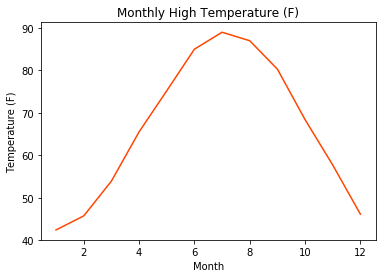

In [37]:
la_temps = [68.2, 68.6, 70.2, 72.7, 74.5, 78.1, 83.1, 84.4, 83.1, 78.5, 72.8, 67.7]
months = np.arange(1,13)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(months, baltimore_temps, color='orangered', label='Baltimore')
#ax.plot(months, la_temps, color='dodgerblue', label='Los Angeles')
ax.set_title('Monthly High Temperature (F)')
ax.set_ylabel('Temperature (F)')
ax.set_xlabel('Month')

# Modifying xticks
# ax.set_xticks(np.arange(1,13))
# ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=90)

# Adding grid axes
#ax.grid(axis='x', color='darkgrey', linestyle='dotted')

# Adding text overlays
#ax.text(9.5, 80.3, 'Sep = 80.3', bbox=dict(facecolor='red', alpha=0.25))

#plt.legend(loc='upper left')

## Customizing the ticks and tick-labels
So far, we've let matplotlib figure out the best tick spacing and labels for our plots, but they are highly customizable.

** Setting x-ticks and y-ticks**

We can manually set the [x-ticks](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html) and [y-ticks](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.yticks.html) using:

`ax.set_xticks([list or 1D array of tick locations])`

`ax.set_yticks([list or 1D array of tick locations])`

** Setting x-ticklabels and y-ticklabels **

We can set the [x-ticklabels](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html) and [y-ticklabels](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_yticklabels.html) using:

`ax.set_xticklabels([list of tick labels as strings])`

`ax.set_yticklabels([list of tick labels as strings])`

** Example **

If we have 12 data points representing some values for a given calendar month, we can set 12 x-ticks with labels as:

`ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])` 

OR 

`ax_set_xticks(np.arange(1,13))`

`ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])`

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

Revise your plot of Baltimore monthly-temperatures to have 12 `xticks` with corresponding monthly `xticklabels`. The labels can be full month names or abbreviated (e.g. 'Jan', or 'J'). 

## Grid lines

We can add [grid lines](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.grid.html) with:

`ax.grid(axis={'x', 'y', or 'both'}` with optional arguments of `color`, `linewidth`, and `linestyle` and many more. 

For instance, drawing grid lines for both axes in a lightgrey dashed style would look like:

`ax.grid(axis='both', color='lightgrey', linestyle='dashed')`

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

Revise your plot of Baltimore monthly-temperatures to have grid lines only for the x-axis, choose an appropriate color (e.g. something not distracting from the data curve!) and give them a 'dotted' `linestyle`.

## Text overlays

We can add text overlays to the plot with:

`ax.text({x-location}, {y-location}, {string of text})` and optional arguments like `fontsize` and `bbox`, which creates a boundary box to include background colors to the text overlay. 

Examples:

* Adding the temperature for February (x-tick of 2, so let's use 2.5 to get it some padding) on the plot:

`ax.text(2.5, 45.7, 'Feb = 45.7')`
* With a fancy border box: 

`ax.text(2.5, 45.7, 'Feb = 45.7', bbox=dict(facecolor='red', alpha=0.25))`

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

Revise your plot of Baltimore monthly-temperatures by adding a text label displaying September's temperture.

## Multi-line plots with labels and a legend

We can add as many lines to a single plot as we wish with additional `ax.plot(x, y)` commands. 

However, we can also attach unique labels to each line with the `label` argument:

`ax.plot(x, y, label='Data 1')`

Then, we can create a [legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html) based on those line labels using:

`plt.legend()` that can take in additional arguments like `loc='upper left'`, `frameon=False`, and more. 

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

Below is a list of average monthly temperatures for Los Angeles. Add this data to the Baltimore plot, attaching labels to each line and creating a legend displaying those labels. 

In [5]:
la_temps = [68.2, 68.6, 70.2, 72.7, 74.5, 78.1, 83.1, 84.4, 83.1, 78.5, 72.8, 67.7]

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

Let's return to last week's dataset `extreme_heat_days_rcp85_tasmax.csv` and use `matplotlib` to plot each GCM's projection of the number of extremely hot days per year over LA through 2099. 

**Instructions**
1. Read in `extreme_heat_days_rcp85_tasmax.csv` to create a new DataFrame. 
2. Slice out the GCM projections spanning 2006-2099.
3. Plot each GCM projection as a line, including appropriate labels (axes and a legend), titles, colors, grid lines, etc. to your plot. 

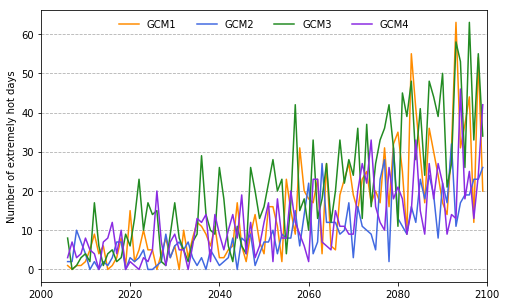

In [38]:
# Read in the CSV file to create a new dataframe
df = pd.read_csv('/Users/nberg/AOS51/data/extreme_heat_days_rcp85_tasmax.csv', 
                           sep=',', index_col=0, parse_dates=True)
df.index.name = None;
# df.head(4)

# Slice out GCM data for 2006 - 2099
gcm1 = df.loc['2006':'2099', 'GCM1']
gcm2 = df.loc['2006':'2099', 'GCM2']
gcm3 = df.loc['2006':'2099', 'GCM3']
gcm4 = df.loc['2006':'2099', 'GCM4']

# Line plot
years = np.arange(2006,2100)

fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(1,1,1)
ax.plot(years, gcm1, color='darkorange', label='GCM1')
ax.plot(years, gcm2, color='royalblue', label='GCM2')
ax.plot(years, gcm3, color='forestgreen', label='GCM3')
ax.plot(years, gcm4, color='blueviolet', label='GCM4')
ax.set_ylabel('Number of extremely hot days')
ax.set_xlim(2000, 2100)
ax.grid(axis='y', linestyle='dashed')
plt.legend(loc='upper center', frameon=False, ncol=4)

## Multi-panel plots

Multi-panel plots have two differences from the single-panel plots we have worked with so far:

1. Each sub-panel needs to have a unique `axes` (e.g. `ax1`, `ax2`, etc.)
2. The sub-panel position needs to be defined when added to the figure in the (row #, col #, plot #) call.

Let's demonstate with a 1 row x 2 column multi-panel plot:

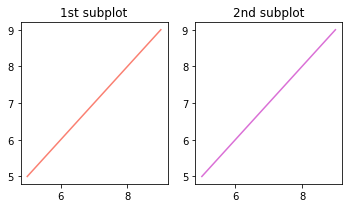

In [7]:
fig = plt.figure(figsize=(5,3)) # specify the figure (width, height) in unit inches

ax1 = fig.add_subplot(1,2,1) # 1 row, 2 columns, 1st subplot
ax1.plot(np.arange(5,10), np.arange(5,10), color='salmon')
ax1.set_title('1st subplot')

ax2 = fig.add_subplot(1,2,2) # 1 row, 2 columns, 2nd subplot
ax2.plot(np.arange(5,10), np.arange(5,10), color='orchid')
ax2.set_title('2nd subplot')

fig.tight_layout() # automatically adjusts subplots to fit in the figure
plt.show()

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

Below are lists storing monthly-average precipitation (unit: inches) for Chicago, San Francisco, and Atlanta. 

** Instructions **
1. Convert each dataset from units of inches to millimeters.
2. Create a 1 row x 3 column plot where each subplot displays a **bar** chart of a given city's monthly-average precipitation.
3. Make sure the y-axis spans the same range for each subplot (i.e. the same `ylim`) to help compare precip across the cities.

In [8]:
chi = [1.73, 1.79, 2.50, 3.38, 3.68, 3.45, 3.70, 4.90, 3.21, 3.15, 3.15, 2.25]
sf = [4.5, 4.46, 3.26, 1.46, 0.70, 0.16, 0.00, 0.06, 0.21, 1.12, 3.16, 4.56]
atl = [4.20, 4.67, 4.81, 3.36, 3.67, 3.95, 5.27, 3.90, 4.47, 3.41, 4.10, 3.90]

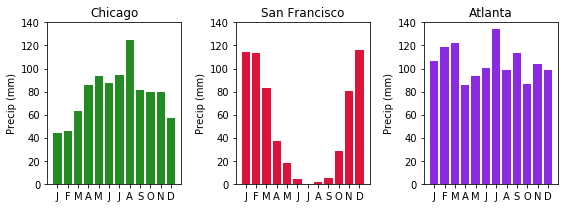

In [9]:
# Convert from inches to mm (1 in = 25.4 mm)
# Need to transform lists to arrays first!
chi_arr = np.array(chi) * 25.4
sf_arr = np.array(sf) * 25.4
atl_arr = np.array(atl) * 25.4

# 1x3 plot
months = np.arange(1,13)

fig = plt.figure(figsize=(8,3))

ax1 = fig.add_subplot(1,3,1)
ax1.bar(months, chi_arr, color='forestgreen')
ax1.set_xticks(np.arange(1,13))
ax1.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax1.set_ylabel('Precip (mm)')
ax1.set_ylim(0, 140)
ax1.set_title('Chicago')

ax2 = fig.add_subplot(1,3,2)
ax2.bar(months, sf_arr, color='crimson')
ax2.set_xticks(np.arange(1,13))
ax2.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax2.set_ylabel('Precip (mm)')
ax2.set_ylim(0, 140)
ax2.set_title('San Francisco')

ax3 = fig.add_subplot(1,3,3)
ax3.bar(months, atl_arr, color='blueviolet')
ax3.set_xticks(np.arange(1,13))
ax3.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax3.set_ylabel('Precip (mm)')
ax3.set_ylim(0, 140)
ax3.set_title('Atlanta')

fig.tight_layout()

#plt.savefig('/Users/nberg/AOS51/figures/precip_bar_charts.eps')

## Saving figures

Now that we've created all these lovely figures, let's save them! 

At the very end of the code to create a figure, simply use:

`plt.savefig({full path and filename})`

to save the figure in your desired location.

For instance, to store a figure called "Histogram.eps" in /Users/nberg/AOS51/figures/:

`plt.savefig('/Users/nberg/AOS51/figures/Histogram.eps')`

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

**Instructions**
1. Create a new sub-directory in your `AOS51` directory called `figures`.
2. Save the 3-panel figure from the last in-class exercise as an .eps file.

# NetCDF Data

### What does netCDF mean?

**Net**work **C**ommon **D**ata **F**orm (or [netCDF](https://en.wikipedia.org/wiki/NetCDF)) is a set of software libraries to manipulate array-oriented (i.e. multi-dimensional) weather and climate data. netCDF files all end with the extension ".nc".


### Opening and reading netCDF files
We'll be working with a file called `skt_sfc_mon_mean_1998_2017.nc`. This file is from the [NCEP-DOE 2 Reanalysis](https://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis2.gaussian.html) and contains global monthly-mean skin-temperature at the surface from January 1998 - December 2017.

Replace "nberg" with your username in the path below to load the netcdf file. 

In [12]:
ncfile = xr.open_dataset('/Users/nberg/AOS51/data/skt_sfc_mon_mean_1998_2017.nc')
ncfile

<xarray.Dataset>
Dimensions:    (lat: 94, lon: 192, nbnds: 2, time: 240)
Coordinates:
  * lat        (lat) float32 -88.542 -86.6531 -84.7532 -82.8508 -80.9473 ...
  * lon        (lon) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.125 ...
  * time       (time) datetime64[ns] 1998-01-01 1998-02-01 1998-03-01 ...
Dimensions without coordinates: nbnds
Data variables:
    skt        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) float64 ...
Attributes:
    Conventions:               CF-1.0
    title:                     Monthly NCEP/DOE Reanalysis 2
    history:                   Thu May 17 17:38:09 2018: ncpdq -a -lat skt_sf...
    comments:                  Data is from \nNCEP/DOE AMIP-II Reanalysis (Re...
    platform:                  Model
    source:                    NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:               National Centers for Environmental Prediction
    dataset_title:             NCEP-DOE AMIP-II Reanalysis
    References:      

### Structure of netCDF data

Data in netCDF files are divided by:

* **dimensions** - spatial (e.g. `latitude` and `longitude`) and temporal (e.g. `time`) dimensions 
* **variables** - climate variables in contained in the file (e.g. `skt`)
* **attributes** - metadata to the file itself, and for a given variable (e.g. the units of a variable)
* **coordinates** (these are of secondary importance to us for now) 

# Extracting variables

We can extract variables from an xarray Dataset with similar syntax as extracting columns from a Pandas Dataframe.

Note how the data format changes from a `Dataset` (multiple variables) to a `DataArray` (single variable). 

In [13]:
skt = ncfile['skt']
skt

<xarray.DataArray 'skt' (time: 240, lat: 94, lon: 192)>
[4331520 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -88.542 -86.6531 -84.7532 -82.8508 -80.9473 ...
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.125 15.0 ...
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 1998-03-01 ...
Attributes:
    long_name:             Monthly Mean of Forecast of SST/Land Skin Temperat...
    valid_range:           [-32765  -1765]
    unpacked_valid_range:  [ 120.  430.]
    actual_range:          [ 190.85420227  314.58322144]
    units:                 degK
    precision:             2
    GRIB_id:               11
    GRIB_name:             TMP
    var_desc:              Skin Temperature
    dataset:               NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly...
    level_desc:            Surface
    statistic:             Individual Obs
    parent_stat:           Other
    standard_name:         temperature
    cell_methods:          time: mean 

### Slicing/selecting data by dimension labels

We can subset data using dimension names and values using the `sel` command. 

In [14]:
# Select a single time:
skt.sel(time='2005-06')

<xarray.DataArray 'skt' (time: 1, lat: 94, lon: 192)>
array([[[ 227.429993,  227.300003, ...,  227.699997,  227.559998],
        [ 229.279999,  229.      , ...,  229.880005,  229.569992],
        ..., 
        [ 271.97998 ,  271.98999 , ...,  271.910004,  271.950012],
        [ 271.869995,  271.869995, ...,  271.859985,  271.859985]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.542 -86.6531 -84.7532 -82.8508 -80.9473 ...
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.125 15.0 ...
  * time     (time) datetime64[ns] 2005-06-01
Attributes:
    long_name:             Monthly Mean of Forecast of SST/Land Skin Temperat...
    valid_range:           [-32765  -1765]
    unpacked_valid_range:  [ 120.  430.]
    actual_range:          [ 190.85420227  314.58322144]
    units:                 degK
    precision:             2
    GRIB_id:               11
    GRIB_name:             TMP
    var_desc:              Skin Temperature
    dataset:               NCEP/D

In [15]:
# Select a single time, lat, and lon
# Note how we need to include the method='nearest' argument, e.g. find the grid cell nearest to 37 degN, 235 degE
skt.sel(time='2010-01', lat=37, lon=235, method='nearest')

<xarray.DataArray 'skt' (time: 1)>
array([ 286.26001], dtype=float32)
Coordinates:
    lat      float32 37.1422
    lon      float32 234.375
  * time     (time) datetime64[ns] 2010-01-01
Attributes:
    long_name:             Monthly Mean of Forecast of SST/Land Skin Temperat...
    valid_range:           [-32765  -1765]
    unpacked_valid_range:  [ 120.  430.]
    actual_range:          [ 190.85420227  314.58322144]
    units:                 degK
    precision:             2
    GRIB_id:               11
    GRIB_name:             TMP
    var_desc:              Skin Temperature
    dataset:               NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly...
    level_desc:            Surface
    statistic:             Individual Obs
    parent_stat:           Other
    standard_name:         temperature
    cell_methods:          time: mean (monthly of 6-hourly values)

In [16]:
# Select a slice of labels 
# Now, we don't need to include the method='nearest' command when slicing a range of lat/lon labels
skt.sel(time=slice('2010-01','2014-12'), lat=slice(25,45))

<xarray.DataArray 'skt' (time: 60, lat: 11, lon: 192)>
[126720 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 25.7139 27.6186 29.5234 31.4281 33.3328 35.2375 ...
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.125 15.0 ...
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 2010-03-01 ...
Attributes:
    long_name:             Monthly Mean of Forecast of SST/Land Skin Temperat...
    valid_range:           [-32765  -1765]
    unpacked_valid_range:  [ 120.  430.]
    actual_range:          [ 190.85420227  314.58322144]
    units:                 degK
    precision:             2
    GRIB_id:               11
    GRIB_name:             TMP
    var_desc:              Skin Temperature
    dataset:               NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly...
    level_desc:            Surface
    statistic:             Individual Obs
    parent_stat:           Other
    standard_name:         temperature
    cell_methods:          time: mea

In [17]:
# Select a slice of times and a single lat/lon 
# Need to do this in two selecting commands:
ncfile['skt'].sel(time=slice('2010-01','2014-12')).sel(lat=45.1, lon=200.5, method='nearest')

<xarray.DataArray 'skt' (time: 60)>
array([ 280.73999 ,  280.330017,  280.080017,  280.109985,  280.660004,
        282.049988,  286.5     ,  289.48999 ,  290.27002 ,  285.119995,
        282.470001,  281.529999,  280.669983,  280.690002,  280.429993,
        280.649994,  281.399994,  282.910004,  288.039978,  292.220001,
        288.539978,  285.640015,  284.27002 ,  283.220001,  281.570007,
        281.160004,  280.589996,  280.369995,  281.      ,  281.919983,
        286.299988,  288.339996,  288.880005,  285.059998,  283.429993,
        282.099976,  281.      ,  280.869995,  280.52002 ,  281.209991,
        283.089996,  284.109985,  287.02002 ,  289.419983,  288.959991,
        287.700012,  285.859985,  284.619995,  283.190002,  281.789978,
        281.089996,  281.179993,  281.399994,  283.649994,  285.720001,
        288.119995,  289.459991,  287.179993,  283.899994,  282.029999], dtype=float32)
Coordinates:
    lat      float32 44.7611
    lon      float32 200.625
  * time     

---
<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

1. Subset 2000-2005 skin temperature at the grid cell nearest to Seattle, WA (47.6 N, 237.7 E).
2. Subset November 1999 skin temperature for latitude nearest to 35 degrees N and all longitudes. 
3. Subset 2015-2017 skin temperature for latitudes within 10-20 degrees N and longitude 90-130 degrees E. 
---

In [18]:
#skt.sel(time=slice('2000-01', '2005-12')).sel(lat=47.6, lon=237.7, method='nearest')
#skt.sel(time='1999-11').sel(lat=35, method='nearest')
skt.sel(time=slice('2015-01', '2017-12'), lat=slice(10,20), lon=slice(90,130))

<xarray.DataArray 'skt' (time: 36, lat: 6, lon: 22)>
array([[[ 301.289978,  301.380005, ...,  300.97998 ,  301.690002],
        [ 301.049988,  301.27002 , ...,  301.149994,  301.559998],
        ..., 
        [ 299.899994,  299.77002 , ...,  299.380005,  299.549988],
        [ 298.549988,  298.380005, ...,  297.869995,  298.059998]],

       [[ 301.220001,  301.47998 , ...,  300.72998 ,  301.299988],
        [ 300.869995,  301.080017, ...,  300.899994,  301.200012],
        ..., 
        [ 299.419983,  299.070007, ...,  298.459991,  298.51001 ],
        [ 298.289978,  297.669983, ...,  297.      ,  297.169983]],

       ..., 
       [[ 302.369995,  302.419983, ...,  302.160004,  302.559998],
        [ 302.339996,  302.419983, ...,  302.320007,  302.48999 ],
        ..., 
        [ 302.419983,  302.359985, ...,  301.359985,  301.459991],
        [ 301.76001 ,  301.459991, ...,  300.72998 ,  300.76001 ]],

       [[ 302.02002 ,  302.179993, ...,  301.899994,  302.48999 ],
        [ 301.9

### Simple xarray plotting

xarray also has simple, yet powerful, [plotting capabilities](https://xarray.pydata.org/en/stable/plotting.html) build on top of matplotlib. 

Now we get to play around with [colormaps](https://matplotlib.org/examples/color/colormaps_reference.html).

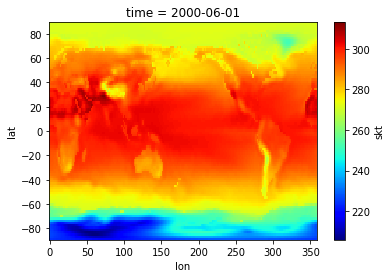

In [19]:
# Skin temperature map on 2000-06-01
skt.sel(time='2000-06-01').plot(cmap='jet')

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

Extract skin temperature on August 2010 and make a global map of it.

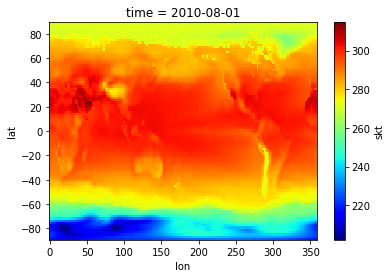

In [20]:
skt.sel(time='2010-08').plot(cmap='jet')

### Simple Statistics

Like Pandas, we can quickly compute the mean, min, max, standard deviation, etc:

In [39]:
# Average across all dimensions (empty parentheses)
skt.mean()

# Average across a specific dimension: .mean(dim=['name of dimension'])
skt.mean(dim='time')

# Maximums across the lat and lon dimensions
skt.max(dim='lat').max(dim='lon')

# Minimum across the entire time series for a subsetted location (Seattle)
skt.sel(lat=47.6, lon=237.7, method='nearest').min(dim='time')

<xarray.DataArray 'skt' ()>
array(270.17999267578125)
Coordinates:
    lat      float32 46.6658
    lon      float32 238.125

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

Compute the maximum monthly temperature during the entire time series for the grid cell nearest to San Francisco (37.8 N, 237.6 E).

Bonus: convert the value from degrees K to degrees Fahrenheit.

In [41]:
sf_max_temp = ncfile['skt'].sel(lat=37.8, lon=237.6, method='nearest').max(dim='time')
sf_max_temp_F = (sf_max_temp -  273.15) * (9/5) + 32
print(sf_max_temp_F)

<xarray.DataArray 'skt' ()>
array(73.34599121093754)
Coordinates:
    lat      float32 37.1422
    lon      float32 238.125


### Resampling to a new temporal frequency

Just like Pandas, we can use the `resample` command to quickly translate monthly data to annual data, for example. 

In [42]:
# Resample monthly to annual data and compute annual-means
skt.resample(time='AS').mean(dim='time')

<xarray.DataArray 'skt' (time: 20, lat: 94, lon: 192)>
array([[[ 229.554993,  229.385849, ...,  229.896667,  229.72583 ],
        [ 231.493347,  231.104172, ...,  232.280823,  231.886673],
        ..., 
        [ 256.226624,  255.869156, ...,  256.215851,  256.2258  ],
        [ 255.885864,  255.646667, ...,  255.669998,  255.669174]],

       [[ 229.291687,  229.111679, ...,  229.645828,  229.467484],
        [ 231.484146,  231.09082 , ...,  232.268356,  231.875839],
        ..., 
        [ 257.089996,  257.004181, ...,  257.009979,  257.053314],
        [ 256.615021,  256.749176, ...,  256.729156,  256.415802]],

       ..., 
       [[ 230.455856,  230.307495, ...,  230.748337,  230.601669],
        [ 232.018356,  231.640823, ...,  232.786682,  232.397507],
        ..., 
        [ 259.7883  ,  259.863373, ...,  259.60498 ,  259.659119],
        [ 259.640839,  259.742493, ...,  259.706665,  259.630005]],

       [[ 228.914993,  228.73584 , ...,  229.277512,  229.095825],
        [ 230

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

* Resample `skt` from monthly to annual frequency and compute the maximum annual temperatures for each grid cell.
* Slice out the maximum annual temperature for 2015 and make a global map of it

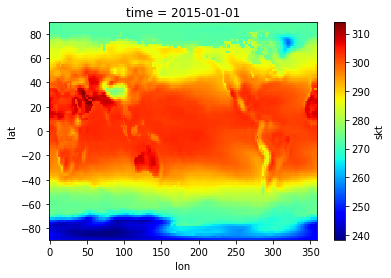

In [25]:
skt.resample(time='AS').max(dim='time').sel(time='2015').plot(cmap='jet')

### Groupby 

`groupby` is similar to `resample`, but is even more flexible and powerful. It offers us a way to quickly generate monthly and seasonal statistics.

In [28]:
# Monthly climatologies
monthly_means = skt.groupby('time.month').mean(dim='time')
# print(monthly_means)

# Extract July and October climatologies 
# Note: Month integers start at 1 not zero when using groupby
skt_july_clim = monthly_means.sel(month=7) 
skt_oct_clim = monthly_means.sel(month=10)
print(skt_oct_clim)

<xarray.DataArray 'skt' (lat: 94, lon: 192)>
array([[ 226.888504,  226.706497,  226.522003, ...,  227.440018,  227.256516,
         227.070999],
       [ 228.761475,  228.279495,  227.807007, ...,  230.201981,  229.726974,
         229.244507],
       [ 229.949493,  229.25351 ,  228.554474, ...,  231.986496,  231.313995,
         230.636475],
       ..., 
       [ 256.445526,  256.648987,  256.735992, ...,  255.913498,  256.139008,
         256.364014],
       [ 256.548523,  256.567474,  256.601013, ...,  256.153992,  256.19101 ,
         256.340515],
       [ 256.434479,  256.606995,  256.613983, ...,  256.534973,  256.58551 ,
         256.346985]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.542 -86.6531 -84.7532 -82.8508 -80.9473 ...
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.125 15.0 ...
    month    int64 10


In [29]:
# Seasonal means
# Note the *new dimension* called season (came from old dimension of time)
seasonal_means = skt.groupby('time.season').mean(dim='time')
print(seasonal_means)

<xarray.DataArray 'skt' (season: 4, lat: 94, lon: 192)>
array([[[ 240.672363,  240.536636, ...,  240.948807,  240.809677],
        [ 242.376465,  242.044327, ...,  243.048508,  242.710693],
        ..., 
        [ 246.949799,  247.030823, ...,  246.83316 ,  246.947723],
        [ 246.211212,  246.405182, ...,  246.361679,  246.160324]],

       [[ 222.361069,  222.170639, ...,  222.737778,  222.5495  ],
        [ 224.456146,  224.025146, ...,  225.316833,  224.88649 ],
        ..., 
        [ 271.580139,  271.600494, ...,  271.562012,  271.579834],
        [ 271.607971,  271.669312, ...,  271.65799 ,  271.604492]],

       [[ 224.402328,  224.190979, ...,  224.822296,  224.613907],
        [ 226.701553,  226.214661, ...,  227.667023,  227.187103],
        ..., 
        [ 254.231796,  254.262497, ...,  254.168854,  254.254654],
        [ 254.040985,  254.142868, ...,  254.114838,  254.016632]],

       [[ 228.644669,  228.473846, ...,  228.987793,  228.815536],
        [ 230.367981,  22

In [30]:
# Extracting a single season
skt_djf = seasonal_means.sel(season='DJF')
print(skt_djf)

<xarray.DataArray 'skt' (lat: 94, lon: 192)>
array([[ 240.672363,  240.536636,  240.401367, ...,  241.087173,  240.948807,
         240.809677],
       [ 242.376465,  242.044327,  241.718811, ...,  243.389633,  243.048508,
         242.710693],
       [ 243.3871  ,  242.873016,  242.365021, ...,  244.954803,  244.434357,
         243.909866],
       ..., 
       [ 247.480667,  247.669815,  247.819351, ...,  247.014496,  247.131302,
         247.340393],
       [ 246.949799,  247.030823,  247.12944 , ...,  246.711472,  246.83316 ,
         246.947723],
       [ 246.211212,  246.405182,  246.39035 , ...,  246.304855,  246.361679,
         246.160324]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.542 -86.6531 -84.7532 -82.8508 -80.9473 ...
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.125 15.0 ...
    season   <U3 'DJF'


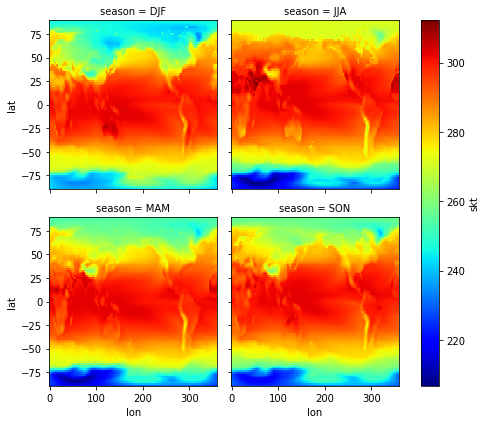

In [31]:
# Easy to plot the 4 seasons using simple xarray plotting function with wrapped columns
seasonal_means.plot(cmap='jet', col='season', col_wrap=2)

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

* Slice out 2001-2010 data from the entire timeseries
* Compute the seasonal-mean temperature during that 10-year span
* Create a 4-panel plot of seasonal-mean temperature

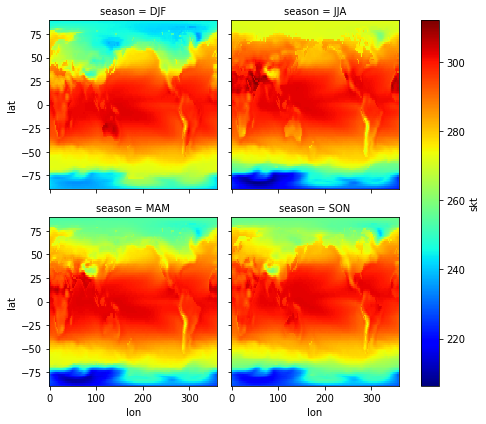

In [33]:
skt.sel(time=slice('2001-01', '2010-12')).groupby('time.season').mean('time').plot(cmap='jet', col='season', col_wrap=2)